## Building the Model and Testing 

We will be utilising our new cleaned data in building our model and testing it for accuracy.

## Importing the Libraries and the Dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time

In [2]:
dataset = pd.read_csv("new_appdata_self.csv")

## Data Preprocessing

In [3]:
target = dataset["enrolled"]

0    0
1    0
2    0
3    1
4    1
Name: enrolled, dtype: int64

In [5]:
dataset = dataset.drop(columns = "enrolled")

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(dataset, target, test_size = 0.2, random_state = 0)

In [11]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(40000, 49)
(10000, 49)
(40000,)
(10000,)


In [16]:
#We have userIDs which we do not require for the model building but will be later required for referencing
train_identifier = X_train["user"]
test_identifier = X_test["user"]

In [17]:
X_train = X_train.drop(columns = "user")
X_test = X_test.drop(columns = "user")

In [18]:
from sklearn.preprocessing import StandardScaler

In [19]:
stand_scale = StandardScaler()

In [20]:
#Since Standard Scaler returns a numpy array, it loses column names and index which will be used later for model building
X_train2 = pd.DataFrame(stand_scale.fit_transform(X_train))

In [21]:
X_test2 = pd.DataFrame(stand_scale.transform(X_test))

In [22]:
X_train2.columns = X_train.columns.values
X_test2.columns = X_test.columns.values

In [23]:
X_train2.index = X_train.index.values
X_test2.index = X_test.index.values

#### Bringing back scaled observations back to original training and test sets

In [24]:
X_train = X_train2
X_test = X_test2

## Building the Model

In [25]:
from sklearn.linear_model import LogisticRegression

In [29]:
#L1 Reguliarization Model to compensate for the screen correlations and other correlations which we may not know about
classifier = LogisticRegression(random_state = 0, penalty = 'l1') 

In [30]:
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l1',
                   random_state=0, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [31]:
y_pred = classifier.predict(X_test)

In [32]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score

In [33]:
conf_matrix = confusion_matrix(y_test, y_pred)

In [35]:
accuracy_sc = accuracy_score(y_test, y_pred)
accuracy_sc

0.7681

In [37]:
precision_sc = precision_score(y_test, y_pred)
precision_sc

0.7618952017667135

In [39]:
recall_sc = recall_score(y_test, y_pred) 
recall_sc

0.7700892857142857

In [41]:
f1_sc = f1_score(y_test, y_pred)
f1_sc

0.7659703300030276

__All 3 scores are approximately equal therefore our model is in good state.__

## Confusion Matrix Plot

Test Data Accuracy: 0.7681


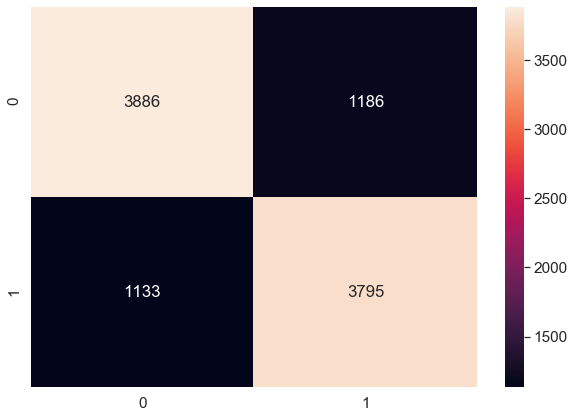

In [42]:
df_conf_matrix = pd.DataFrame(conf_matrix, index = (0, 1), columns = (0, 1))
plt.figure(figsize=(10, 7))
sns.set(font_scale=1.4)
sns.heatmap(df_conf_matrix, annot=True, fmt='g')
print("Test Data Accuracy: {:.4f}".format(accuracy_sc))

## Cross Validation for the Model

In [43]:
from sklearn.model_selection import cross_val_score

In [44]:
accuracies_cross_val = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)

C:\Users\ptpar\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ptpar\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ptpar\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ptpar\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ptpar\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linea

In [61]:
print("Logistic Accuracy: {:.3f} (+/- {:.3f})".format(accuracies_cross_val.mean(), accuracies_cross_val.std() * 2))

Logistic Accuracy: 0.767 (+/- 0.010)


# Final Results Formatting

In [62]:
final_results = pd.concat([y_test, test_identifier], axis = 1).dropna()

In [63]:
final_results['Predicted_Results'] = y_pred

In [64]:
final_results[['user', 'enrolled', 'Predicted_Results']].reset_index(drop=True)

,user,enrolled,Predicted_Results
0,239786,1,1
1,279644,1,1
2,98290,0,0
3,170150,1,1
4,237568,1,1
5,65042,1,0
6,207226,1,1
7,363062,0,0
8,152296,1,1
9,64484,0,0


# Conclusion

- We have created a model that will label every new user as "highly likely" or "unlikely" to subscribe. We can further validate our results by running our predictions on daily new installs, and see whether our accuracy is consistent. From therem we can narrow our marketing only to those "unlikely" users.


- The increase in overall subscriptions can measure the benefit of this model to the company. We know that those who are already likely to be subscriped will do so however we can push them with new offers but with less discounts than those who are completely unlikely to join.


- Solutions to unlikely users could be offers such as 50% off for yearly subscription. Such an offer will ensure that they are bound to the app for an extended period of time




